## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one.

##### Environment installations for Ubuntu 16.04

##### Basic installation
sudo apt-get update

sudo apt-get install build-essential

Installed and activated anaconda3

sudo apt-get install python-setuptools

##### xgboost installation

git clone --recursive https://github.com/dmlc/xgboost

cd xgboost; make -j4

cd python-package; sudo python setup.py install

export PYTHONPATH="/home/ubuntu/xgboost/python-package:$PYTHONPATH"

##### Import dependencies

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

##### Import Dataset

In [2]:
data = pd.read_csv("bank-additional-full.csv")

##### See Data

In [3]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


#### Data is semicolon seperated so read again properly

In [4]:
data = pd.read_csv("bank-additional-full.csv", sep=';')

##### See again

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Looks good now.

##### Convert dataframe to list of dicts

In [6]:
data_dict = data.T.to_dict().values()


##### vectorise features such that text based classifications are transformed one hot encoded features

In [7]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()
# signal_array = data.as_matrix() #spits out a numpy matrix
# feature_names = list(data)


In [8]:
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

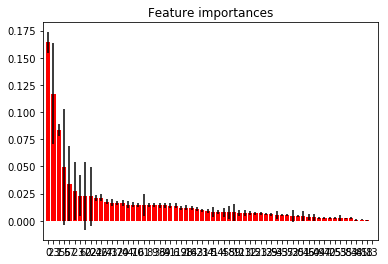

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

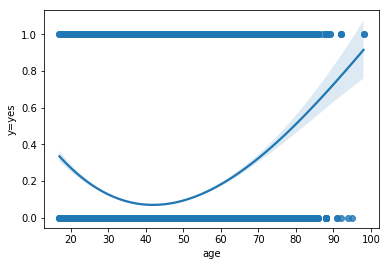

In [10]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)


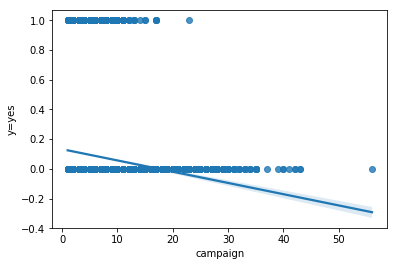

In [11]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)


##### Shows that any campaign after 20 is useless. Hence no customer must be approached more than 20 times.

In [12]:
df.loc[(df['campaign'] >15) & (df['y=yes']==1)]

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
3219,39.0,23.0,-36.4,93.994,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0.0,1.0
10162,44.0,17.0,-41.8,94.465,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17284,59.0,17.0,-42.7,93.918,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17655,50.0,17.0,-42.7,93.918,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
29980,31.0,17.0,-47.1,93.075,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5099.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0


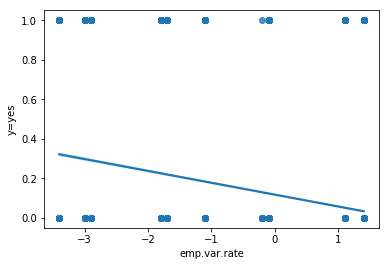

In [13]:

ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)


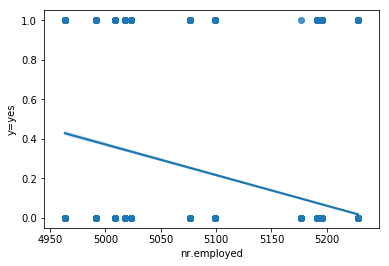

In [14]:

ax = sns.regplot(x="nr.employed", y="y=yes", order=1, data=df, truncate=True)


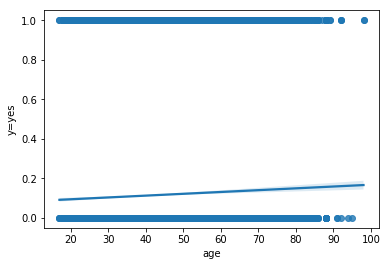

In [15]:
ax = sns.regplot(x="age", y="y=yes", order=1, data=df, truncate=True)


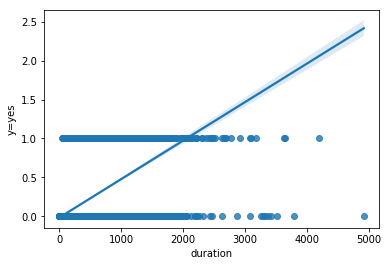

In [16]:
ax = sns.regplot(x="duration", y="y=yes", order=1, data=df, truncate=True)

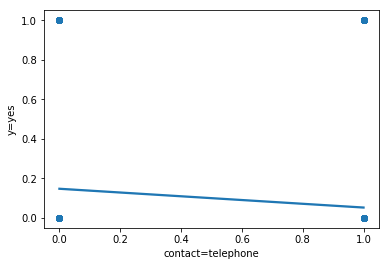

In [17]:

ax = sns.regplot(x="contact=telephone", y="y=yes", order=1, data=df, truncate=True)

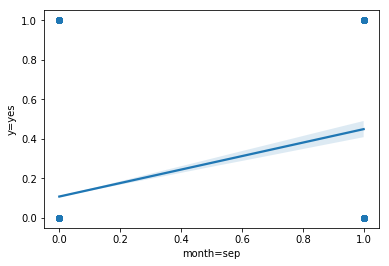

In [18]:

ax = sns.regplot(x="month=sep", y="y=yes", order=1, data=df, truncate=True)

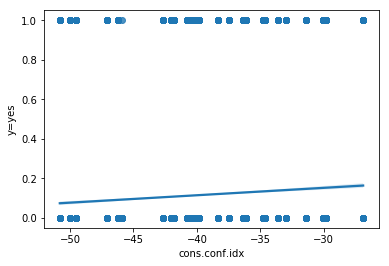

In [19]:

ax = sns.regplot(x="cons.conf.idx", y="y=yes", order=1, data=df, truncate=True)

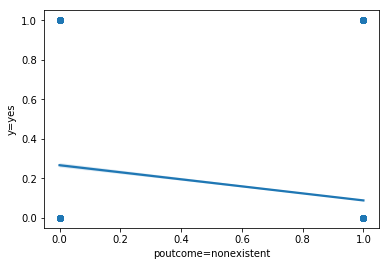

In [20]:

ax = sns.regplot(x="poutcome=nonexistent", y="y=yes", order=1, data=df, truncate=True)

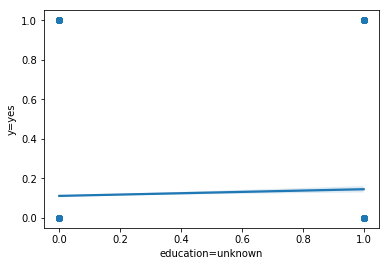

In [21]:

ax = sns.regplot(x="education=unknown", y="y=yes", order=1, data=df, truncate=True)

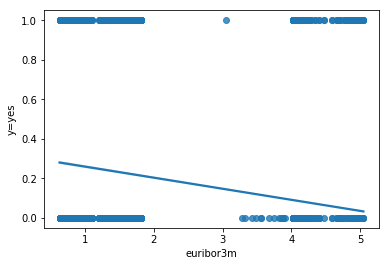

In [22]:

ax = sns.regplot(x="euribor3m", y="y=yes", order=1, data=df, truncate=True)

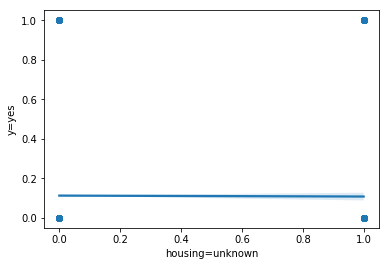

In [23]:

ax = sns.regplot(x="housing=unknown", y="y=yes", order=1, data=df, truncate=True)

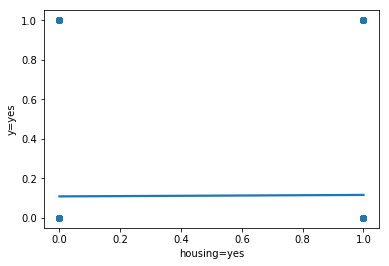

In [24]:

ax = sns.regplot(x="housing=yes", y="y=yes", order=1, data=df, truncate=True)

# Let's optimize using campaign

In [25]:
# Total Conversion ratio
sum(df['y=yes'])/sum(df['campaign'])

0.043875408967982296

In [57]:
# Now let's see efficiancy on every additional call
print "Nth Call \t Efficiency"
for i in range(1,30):
    goo = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Nth Call 	 Efficiency
1 		 0.0558415072351
2 		 0.0514312409751
3 		 0.0442355117139
4 		 0.0326129666012
5 		 0.024077046549
6 		 0.0221565731167
7 		 0.0157938487116
8 		 0.00956668542487
9 		 0.0123456790123
10 		 0.0109689213894
11 		 0.0138089758343
12 		 0.00433526011561
13 		 0.00705467372134
14 		 0.00210526315789
15 		 0.00492610837438
16 		 0.0
17 		 0.0131578947368
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.00862068965517
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


The Market acceptable conversion ratio is 2-10% so it is a fair to say any call after the 6th call is not acceptable since it has a conversion ratio of less than 1.6%

## Now Let's evaluate how much we can optimize on age.
#### Let's divide age into 10 year brackets


In [46]:
print("For age upto 30")
print "Nth Call \t Efficiency"
for i in range(1,30):
    num = float(df[(df['age'] <= 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
    

For age upto 30
Nth Call 	 Efficiency
1 		 0.0750372477313
2 		 0.0710200190658
3 		 0.0627724498692
4 		 0.0445103857567
5 		 0.0388692579505
6 		 0.020618556701
7 		 0.0308788598575
8 		 0.00651465798046
9 		 0.0129310344828
10 		 0.00540540540541
11 		 0.013986013986
12 		 0.0
13 		 0.010989010989
14 		 0.0
15 		 0.0149253731343
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [48]:
print("For age between 30-40")
print "Nth Call \t Efficiency"
for i in range(1,30):
    num = float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
    

For age between 30-40
Nth Call 	 Efficiency
1 		 0.0488251449496
2 		 0.0426484699861
3 		 0.0400622325943
4 		 0.0281030444965
5 		 0.0204918032787
6 		 0.0242976461655
7 		 0.0075026795284
8 		 0.00875912408759
9 		 0.0115606936416
10 		 0.0120192307692
11 		 0.0150602409639
12 		 0.00763358778626
13 		 0.00956937799043
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.00934579439252
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0208333333333
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [49]:
print("For age between 40-50")
print "Nth Call \t Efficiency"
for i in range(1,30):
    num = float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
    

For age between 40-50
Nth Call 	 Efficiency
1 		 0.0392578125
2 		 0.0363512824868
3 		 0.0304859643827
4 		 0.0278350515464
5 		 0.0207532667179
6 		 0.0168728908886
7 		 0.00802568218299
8 		 0.0083857442348
9 		 0.00534759358289
10 		 0.01393728223
11 		 0.0173913043478
12 		 0.00546448087432
13 		 0.00666666666667
14 		 0.008
15 		 0.0
16 		 0.0
17 		 0.0238095238095
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [54]:
print("For age between 50-60")
print "Nth Call \t Efficiency"
for i in range(1,30):
    num = float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 50-60
Nth Call 	 Efficiency
1 		 0.0507096156913
2 		 0.0512048192771
3 		 0.0408062930187
4 		 0.0246815286624
5 		 0.0167664670659
6 		 0.0212014134276
7 		 0.0220048899756
8 		 0.0135593220339
9 		 0.0244897959184
10 		 0.00990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0113636363636
16 		 0.0
17 		 0.0161290322581
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [53]:
print("For age above 60")
print "Nth Call \t Efficiency"
for i in range(1,30):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Efficiency
1 		 0.248079034029
2 		 0.258064516129
3 		 0.205128205128
4 		 0.192307692308
5 		 0.122448979592
6 		 0.121212121212
7 		 0.181818181818
8 		 0.0666666666667
9 		 0.0
10 		 0.0
11 		 0.166666666667
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


No extra ordinary patterns visible in age groups compared to the numbers over all ages

In [64]:
# Calculate how many calls were made in total
total_calls = sum(df['campaign'])
print(total_calls)

105754.0


In [63]:
# Calculate how many calls were made after the 6th call
extra_calls = sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [66]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print(reduction)

11.3849121546


In [78]:
total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [83]:
less_costly_sales=float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [85]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.6077586207


## Hence a reduction of about 11.4% in marketing cost can be achieved while maintaining 97.6% sales if any person is called a maximum of 6 times.